# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import pandas_profiling

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [ ]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [ ]:
# Creating a DataFrame with given raw data and assigning it object Pokemon
pokemon = pd.DataFrame(raw_data)

# Calling Object Pokemon
pokemon

### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [ ]:
# ReIndexing the DataFrame with the given criteria
pokemon = pokemon[['name','type','hp','evolution','pokedex']]

pokemon

### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [ ]:
pokemon.insert(5,'place',['lake','parks','hills','forest'])

pokemon

### 6. Display the data type of each column

In [ ]:
pokemon.dtypes

### 7. Display the info of dataframe

In [ ]:
pokemon.info()

## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [ ]:
wine = pd.read_table(r'.\Exercise Data Files\wine.txt', delimiter=',',header=None)

wine

### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [ ]:
wine.drop(columns=[0,3,6,8,10,12,13],inplace=True)

wine

### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [ ]:
wine.columns = ['alcohol','malic_acid','alcalinity_of_ash','magnesium','flavanoids','proanthocyanins','hue']

wine

### 11. Set the values of the first 3 values from alcohol column as NaN

In [ ]:
wine.alcohol.iloc[:3] = np.NaN

wine.head()

### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [ ]:
wine.magnesium.iloc[2:4] = np.NaN

wine.head()

### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [ ]:
wine.alcohol = wine.alcohol.fillna(10)
wine.magnesium = wine.magnesium.fillna(100)

wine.head()

### 14. Count the number of missing values in all columns.

In [ ]:
wine.isnull().sum()

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [ ]:
random_Num = np.random.randint(0,11,10)
random_Num

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [ ]:
wine.alcohol.iloc[random_Num] = np.NaN

wine.head(15)

### 17.  How many missing values do we have now?

In [ ]:
wine.isnull().sum()

### 18. Print only the non-null values in alcohol

In [ ]:
wine.alcohol.dropna().head(20)

### 19. Delete the rows that contain missing values

In [ ]:
wine.dropna(inplace=True)

### 20.  Reset the index, so it starts with 0 again

In [ ]:
wine.reset_index(drop=True)

## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [ ]:
chipo = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [ ]:
chipo.item_price = chipo.item_price.str.replace('$','', regex=True).astype(float)

print('Number of Products cost more than $10 are :', chipo.item_price[chipo.item_price > 10].count() )

### 22. Print the Chipo Dataframe & info about data frame

In [ ]:
#chipo_DF = pd.DataFrame(data=chipo)

print(chipo)
print(chipo.info())



### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [ ]:
filtered = chipo.drop_duplicates(['item_name', 'quantity'])


one_prod = filtered[filtered.quantity == 1]


price_per_item = one_prod[['item_name','item_price']]


price_per_item.sort_values(by='item_price',ascending=False)

### 24. Sort by the name of the item

In [ ]:
chipo.sort_values('item_name')

### 25. What was the quantity of the most expensive item ordered?

In [ ]:
chipo.sort_values(by='item_price',ascending=False).head(1)

### 26. How many times were a Veggie Salad Bowl ordered?

In [ ]:
chipo[chipo.item_name == 'Veggie Salad Bowl']

### 27. How many times people orderd more than one Canned Soda?

In [ ]:
chipo[(chipo.item_name == 'Canned Soda') & (chipo.quantity > 1)]

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [ ]:
users = pd.read_csv('.\Exercise Data Files\occupation.csv', delimiter='|')
users.head()

### 29. Discover what is the mean age per occupation

In [ ]:
users.groupby('occupation').age.mean()

### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [ ]:
users['Gender_code'] = np.where(users.gender == 'M',1,0)

ratio = users.groupby('occupation').Gender_code.sum() / users.occupation.value_counts() * 100

Male_ratio = ratio.sort_values(ascending=False)

Male_ratio

### 31. For each occupation, calculate the minimum and maximum ages

In [ ]:
users.groupby('occupation').age.agg(['min','max'])

### 32. For each combination of occupation and gender, calculate the mean age

In [ ]:
users.groupby(['occupation','gender']).age.mean()

### 33.  For each occupation present the percentage of women and men

In [ ]:
gender_occ = users.groupby(['occupation','gender']).agg({'gender':'count'})

occ_count = users.groupby(['occupation']).count()

x = gender_occ.div(occ_count, level='occupation')

x['gender']

## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [ ]:
std_mat = pd.read_csv('.\Exercise Data Files\student-mat.csv')

std_por = pd.read_csv('.\Exercise Data Files\student-por.csv')

df = std_mat.append(std_por)

### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [ ]:
df = df.loc[:,'school':'guardian']

df

### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [ ]:
def Cap():
    return lambda a : a.capitalize()

### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [ ]:
df.Mjob = df.Mjob.apply(Cap())
df.Fjob = df.Fjob.apply(Cap())

df.head()

### 38. Print the last elements of the data set. (Last few records)

In [ ]:
df.tail()

### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [ ]:
df

### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [ ]:
def majority():
    return lambda x : True if x > 17 else False

df['legal_drinker'] = df.age.apply(majority())

df.head(20)

### 41. Multiply every number of the dataset by 10. 

In [ ]:
Mulitply_10 = lambda x : x * 10 if (type(x) is int) else x

df.applymap(Mulitply_10).head(10)

## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [ ]:
cars1 = pd.read_csv('.\Exercise Data Files\cars1.csv')
cars2 = pd.read_csv('.\Exercise Data Files\cars2.csv')

   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [ ]:
print('Type : ',type(cars1))
print('Head : ',cars1.head())
print('Tail : ',cars1.tail())
print('Info : ',cars1.info())
print('Columns : ',cars1.columns)
print('Dtypes : ',cars1.dtypes)
print('Index : ',cars1.index)
print('Shape : ',cars1.shape)
print('Count : ',cars1.count())
print('Size : ',cars1.size)
print('Ndim : ',cars1.ndim)
print('Axes : ',cars1.axes)
print('Describe',cars1.describe)
print('Memory_Usage : ',cars1.memory_usage())
print('Sort_Values : ',cars1.sort_values(by='weight').head())
print('Value_Counts : ',cars1.value_counts())



cars1_report = pandas_profiling.ProfileReport(cars1)

cars1_report.to_file('cars1.html')

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [ ]:
cars1.dropna(axis=1)

### 45. What is the number of observations in each dataset?

In [ ]:
print('cars1 = ',cars1.shape[0])
print('cars2 = ',cars2.shape[0])

### 46. Join cars1 and cars2 into a single DataFrame called cars

In [ ]:
cars = pd.concat([cars1, cars2])
cars.head()

### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [ ]:
owners = np.random.randint(15000,73000,size=cars.shape[0])

owners

### 48. Add the column owners to cars

In [ ]:
cars['owners'] = owners

cars.head()

## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [ ]:
import datetime as dt

In [ ]:
today = dt.date.today()

In [ ]:
print('Current Date and Time :', dt.datetime.now())
print('Current Year :', today.strftime('%Y') )
print('Current month :', today.strftime('%m'))
print('Week number of the year :',today.strftime('%V'))
print('Weekday of the week : ',today.strftime('%A'))
print('Day of year : ',today.strftime('%j'))
print('Day of the Month : ', today.strftime('%d'))
print('Day of the Week : ', today.strftime('%w'))

### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [ ]:
print(datetime.datetime.strptime('Jul 1 2014 2:43PM', '%b %d %Y %I:%M%p'))

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [ ]:
print( datetime.datetime.today() - dt.timedelta(5))

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [ ]:
print(datetime.datetime.utcfromtimestamp(int('1284105682')).strftime('%Y-%m-%d %H:%M:%S'))

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [ ]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

pd.to_datetime(DoB)- pd.offsets.DateOffset(years=100)

### 54. Write a Python program to get days between two dates. 

In [ ]:
date1 = dt.date(2021,11,17)
date2 = dt.date(2021,8,11)

print((date1-date2).days)

### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [ ]:
Date = "15Dec1989"

a_date = dt.datetime.strftime((dt.datetime.strptime(Date,'%d%b%Y')),'%A, %d %b %y')

a_date

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [ ]:
data = pd.read_table('.\Exercise Data Files\wind.data', delimiter=',')

data['Date'] = pd.to_datetime(data[['Yr','Mo','Dy']].astype(str).agg('-'.join, axis=1))

data.drop(['Yr','Mo','Dy'], axis=1, inplace=True)

data.head()

### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [ ]:
#data['Date'] = np.where(pd.DatetimeIndex(data['Date']).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))

data.head()

data.info()

### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [ ]:
Data = data.set_index(data.Date)
Data.index.astype('datetime64[ns]')

### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [ ]:
print(Data.isnull().sum().sum())

### 60. Compute how many non-missing values there are in total.

In [ ]:
print(Data.notnull().sum().sum())

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [ ]:
print('Mean',(Data.mean()).mean())

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [ ]:
def loc(x):
    x = pd.Series(x)
    Min = x.min()
    Max = x.max()
    Mean = x.mean()
    Std = x.std()
    result = [Min,Max, Mean, Std]
    ind = ['Min','Max','Mean','Std']
    result = pd.Series(result, index=ind)
    return result

loc_stats = Data.apply(loc)

loc_stats

### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [ ]:
day_stats = Data.apply(loc, axis=1)

day_stats.head()


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [ ]:
Jan = Data[Data.index.month == 1]

print('January Average :\n',Jan.mean())

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [ ]:
Data_month = Data.groupby(lambda d:(d.month, d.year))

print('Mean windspeed for each month in the DataSet :',Data_month.mean())

### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [ ]:
first = Data[Data.index.year == 1961]

mean_week = first.resample('W').mean().apply(lambda x: x.describe())

print(mean_week)

## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [ ]:
apple = pd.read_csv(r'.\Exercise Data Files\appl_1980_2014.csv')

apple.head()

### 68.  Check out the type of the columns

In [ ]:
apple.dtypes

### 69. Transform the Date column as a datetime type

In [ ]:
apple.Date = pd.to_datetime(apple.Date)

### 70.  Set the date as the index

In [ ]:
apple.set_index(apple.Date)

apple.head()

### 71.  Is there any duplicate dates?

In [ ]:
a = apple.duplicated('Date').value_counts()

if len(a) != 0:
    print('No, Duplicates not are present')
else:
    print('Yes, Duplicates are present')

### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [ ]:
apple = apple.sort_values(by="Date",ascending=True).reset_index(drop=True)

apple

### 73. Get the last business day of each month

In [ ]:
apple['Month'] = pd.DatetimeIndex(apple.Date).month
apple['working_day'] = pd.DatetimeIndex(apple.Date).day

apple.groupby(by='Month')[['working_day']].max().reset_index()

### 74.  What is the difference in days between the first day and the oldest

In [ ]:
diff = apple.Date.max() - apple.Date.min()

str(diff)

### 75.  How many months in the data we have?

In [ ]:
apple.Month.value_counts().sum()

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [ ]:
plt.figure(figsize=(13.5, 9))
plt.hist(apple["Adj Close"])
plt.show()

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [2]:
online_rt = pd.read_csv('.\Exercise Data Files\Online_Retail.csv')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

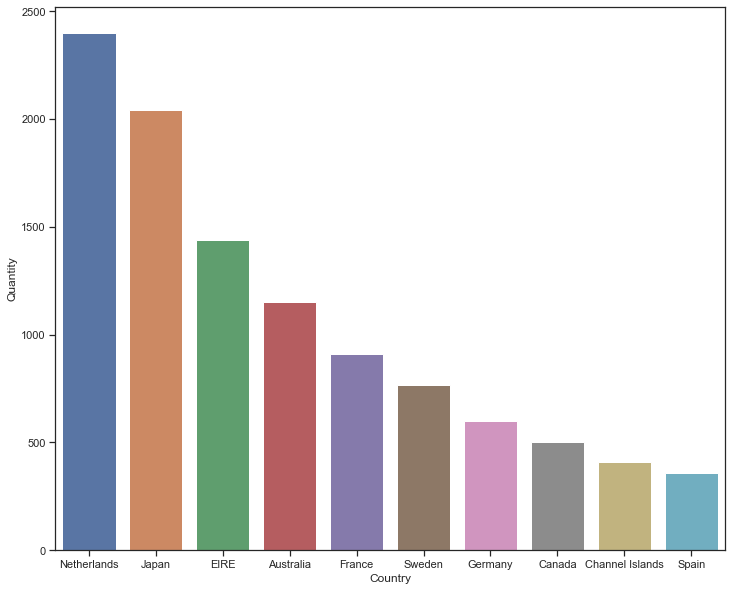

In [3]:
most = online_rt.groupby('Country')[['Quantity']].max()

most = most.sort_values('Quantity', ascending=False).reset_index()

most.drop(most[most.Country == "United Kingdom"].index, inplace=True)

most = most.drop(most.index[10:]).reset_index(drop=True)

plt.figure(figsize=(12, 10))

sns.barplot(x= 'Country',y = 'Quantity', data=most)

plt.show()

### 79.  Exclude negative Quatity entries

In [4]:
online_rt1 = online_rt[(online_rt.Quantity > 0)].reset_index(drop=True)

online_rt1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
531280,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
531281,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
531282,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
531283,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


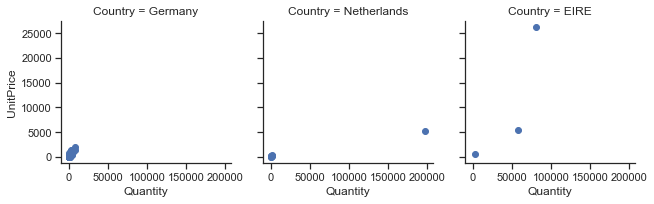

In [5]:
customers = online_rt1.groupby(['CustomerID', 'Country']).sum()

customers['Country'] = customers.index.get_level_values(1)

Top = ['Netherlands','EIRE','Germany']

customers = customers[customers['Country'].isin(Top)]

sctr_plt = sns.FacetGrid(customers, col="Country")

sctr_plt.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

sctr_plt.add_legend()

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [3]:
company_data = pd.read_csv('.\Exercise Data Files\FMCG_Company_Data_2019.csv')

company_data

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

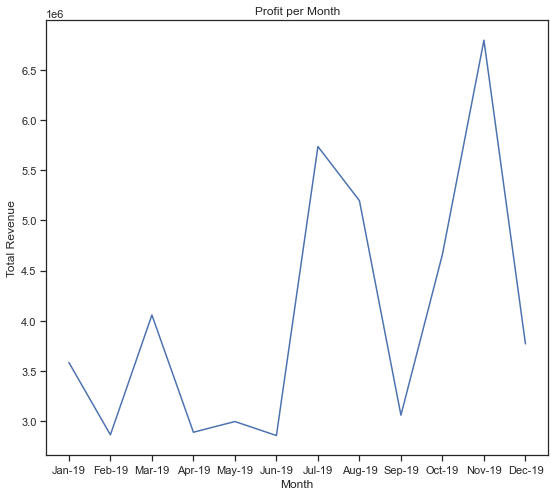

In [7]:
plt.figure(figsize=(9,8))

plt.plot(company_data.Month, company_data.Total_Revenue)

plt.xlabel('Month')

plt.ylabel('Total Revenue')

plt.title('Profit per Month')

plt.show()

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

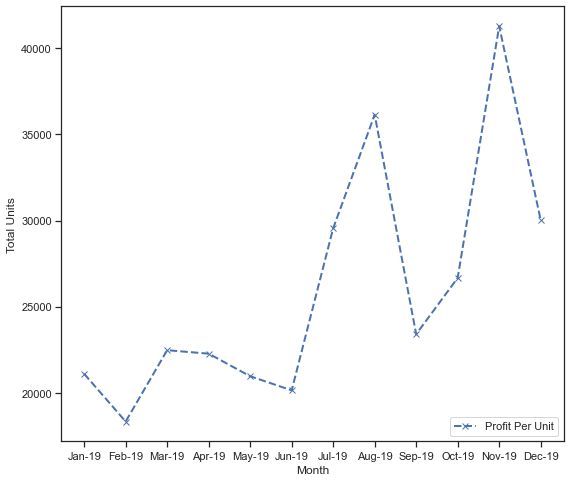

In [9]:
plt.figure(figsize=(9,8))

plt.plot(company_data.Month, company_data.Total_Units, label='Profit Per Unit', color='b',marker = 'x', linestyle='--', linewidth =2)

plt.xlabel('Month')

plt.ylabel('Total Units')

plt.legend(loc='lower right')

plt.show()

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot

- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

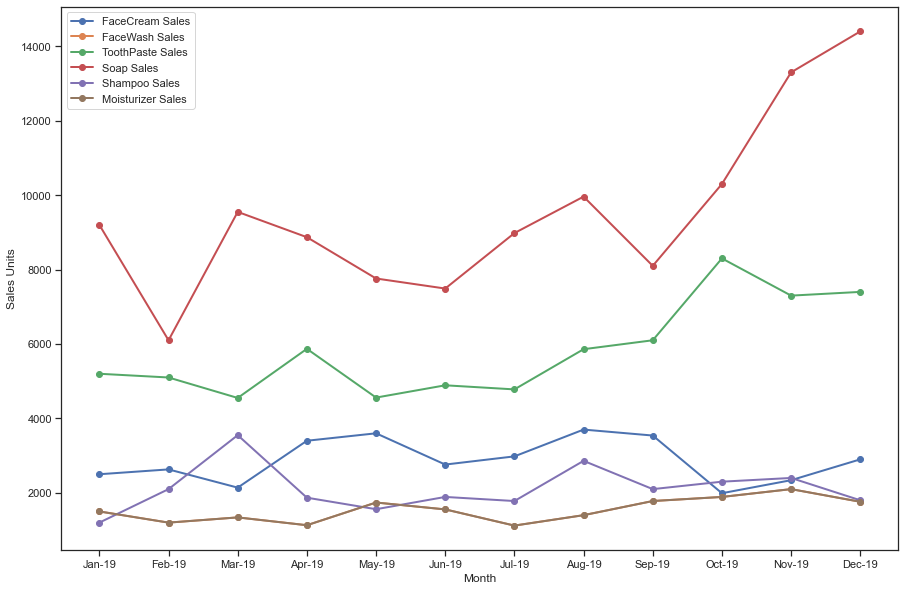

In [12]:
plt.figure(figsize=(15,10))

plt.plot(company_data.Month,company_data.FaceCream, label='FaceCream Sales', marker='o', linestyle='-', linewidth =2)

plt.plot(company_data.Month,company_data.FaceWash,label='FaceWash Sales', marker='o', linestyle='-', linewidth =2)

plt.plot(company_data.Month,company_data.ToothPaste, label='ToothPaste Sales', marker='o', linestyle='-', linewidth =2)

plt.plot(company_data.Month,company_data.Soap, label='Soap Sales', marker='o', linestyle='-', linewidth =2)

plt.plot(company_data.Month,company_data.Shampo, label='Shampoo Sales', marker='o', linestyle='-', linewidth =2)

plt.plot(company_data.Month,company_data.Moisturizer, label='Moisturizer Sales', marker='o', linestyle='-', linewidth =2)

plt.xlabel('Month')

plt.ylabel('Sales Units')

plt.legend(loc='upper left')

### 85. Create Bar Chart for soap of all months and Save the chart in folder

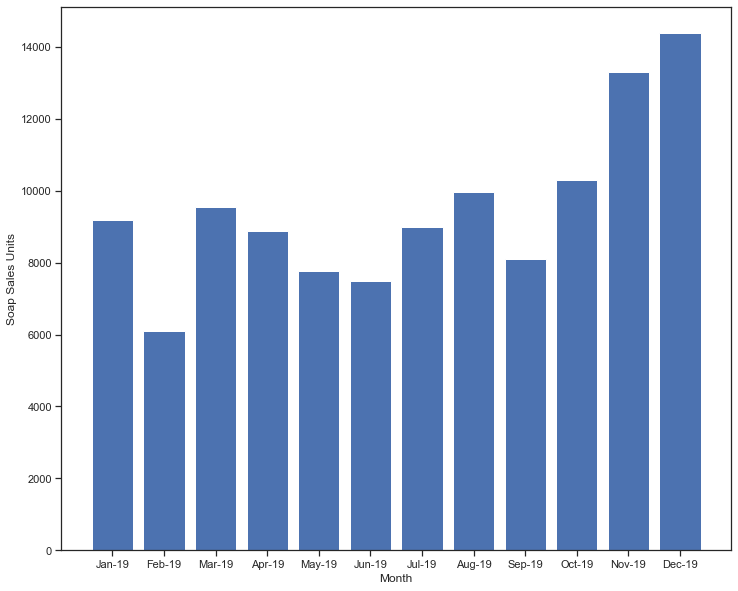

In [184]:
plt.figure(figsize=(12,10))

plt.bar(company_data.Month, company_data.Soap)

plt.xlabel('Month')

plt.ylabel('Soap Sales Units')

plt.savefig('SoapSales.png')

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

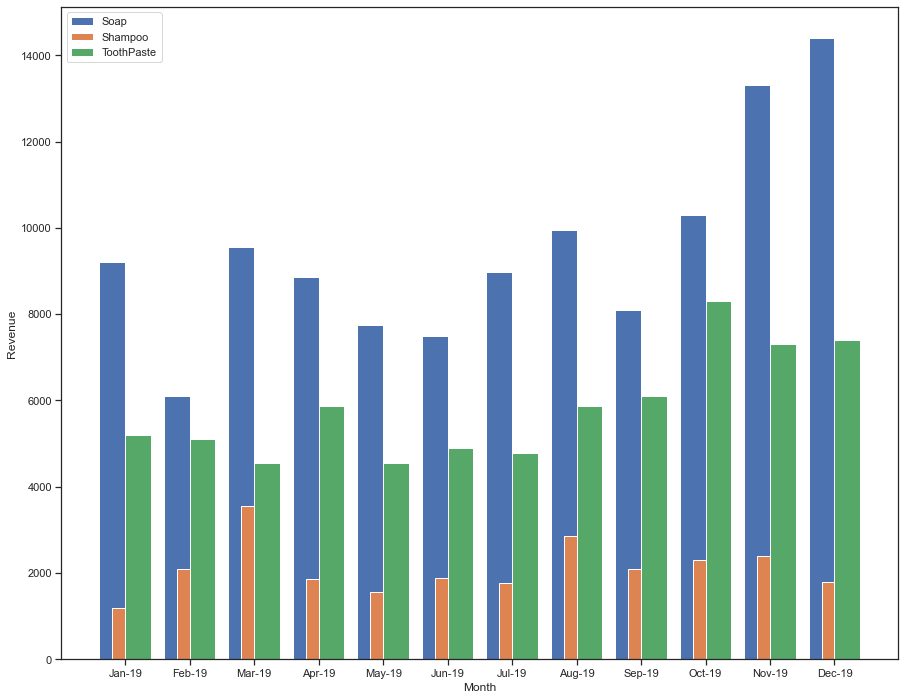

In [65]:
X = company_data.Month.to_list()
soap = company_data.Soap.to_list()
shampo = company_data.Shampo.to_list()
toothpaste = company_data.ToothPaste.to_list()

X_axis = np.arange(len(X))

plt.figure(figsize=(15,12))
plt.bar(X_axis - 0.2, soap, label = 'Soap', width=0.4)
plt.bar(X_axis, shampo, label = 'Shampoo', width=0.4)
plt.bar(X_axis + 0.2, toothpaste, label = 'ToothPaste', width=0.4)

plt.xticks(X_axis, X)
plt.xlabel("Month")
plt.ylabel("Revenue")

plt.legend()
plt.show()

### 87. Create Histogram for Total Revenue

(array([8., 0., 0., 0., 0., 2., 0., 0., 0., 2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

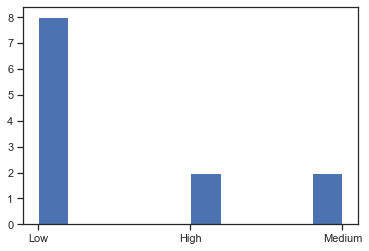

In [7]:
bins = np.linspace(min(company_data.Total_Revenue), max(company_data.Total_Revenue), 4)

grp = ['Low','Medium','High']

company_data['Total_Revenue_Bin'] = pd.cut(company_data['Total_Revenue'], bins, labels=grp, include_lowest=True)

plt.hist(company_data.Total_Revenue_Bin)

<ipython-input-73-9fd6ea24ab9e>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.gca().set(Title='Total Revenue', ylabel='Revenue')


[Text(0.5, 1.0, 'Total Revenue'), Text(0, 0.5, 'Revenue')]

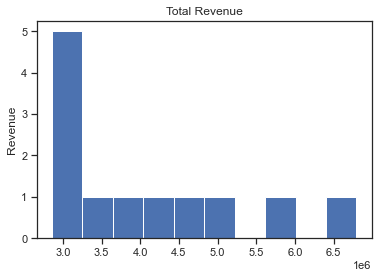

In [73]:
x = company_data.Total_Revenue

plt.hist(x)

plt.gca().set(Title='Total Revenue', ylabel='Revenue')

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

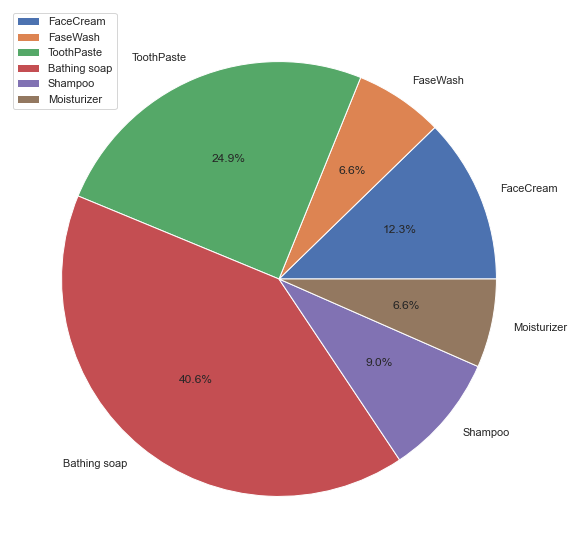

In [85]:
lable = ['FaceCream', 'FaseWash', 'ToothPaste', 'Bathing soap', 'Shampoo', 'Moisturizer']

plt.figure(figsize=(10,10))

Prod_sum = [company_data['FaceCream'].sum(), company_data['FaceWash'].sum(), company_data['ToothPaste'].sum(), 
            company_data['Soap'].sum(), company_data['Shampo'].sum(), company_data['Moisturizer'].sum()]

plt.pie(Prod_sum, labels=lable, autopct='%1.1f%%')

plt.legend(loc='upper left')

plt.show()

### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

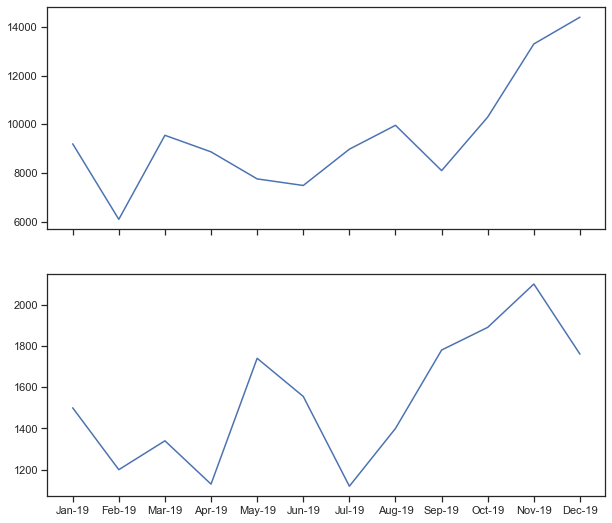

In [14]:
fig, ax = plt.subplots(2, sharex=True,figsize=(10,9))

ax[0].plot(company_data.Month, company_data.Soap)

ax[1].plot(company_data.Month, company_data.FaceWash)

### 90. Create Box Plot for Total Profit variable

{'whiskers': [<matplotlib.lines.Line2D at 0x246f6fcf220>,
 'caps': [<matplotlib.lines.Line2D at 0x246f6fe36a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246f7247040>],
 'medians': [<matplotlib.lines.Line2D at 0x246f6fcfc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x246f6fcf2e0>],
 'means': []}

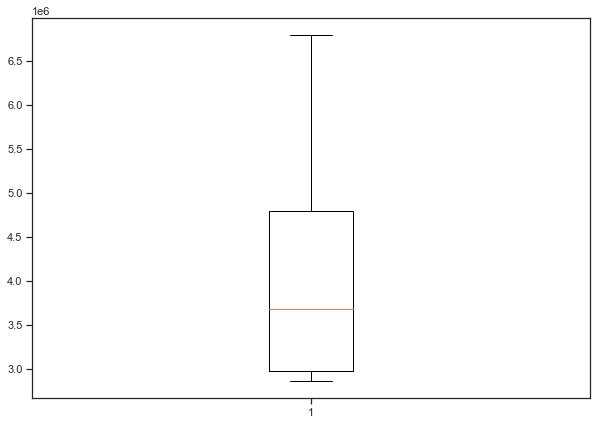

In [88]:
pro = company_data.Total_Profit

plt.figure(figsize=(10,7))
plt.boxplot(x)